<div align="center">

#### Lab 3

# National Tsing Hua University

#### Spring 2024

#### 11220IEEM 513600

#### Deep Learning and Industrial Applications
    
## Lab 3: Anomaly Detection in Industrial Applications

</div>

#### #dataset不可以用cable(電纜)助教用的那一個product
### Introduction

In today's industrial landscape, the ability to detect anomalies in manufacturing processes and products is critical for maintaining quality, efficiency, and safety. This lab focuses on leveraging deep learning techniques for anomaly detection in various industrial applications, using the MVTEC Anomaly Detection Dataset. By employing ImageNet-pretrained models available in torchvision, students will gain hands-on experience in classfying defects and irregularities across different types of industrial products.

Throughout this lab, you'll be involved in the following key activities:
- Explore and process the MVTec Anomaly Detection Dataset.
- Apply ImageNet-pretrained models from [Torchvision](https://pytorch.org/vision/stable/models.html) to detect anomalies in industrial products.
- Evaluate the performance of the models to understand their effectiveness in real-world industrial applications.

### Objectives

- Understand the principles of anomaly detection in the context of industrial applications.
- Learn how to implement and utilize ImageNet-pretrained models for detecting anomalies.
- Analyze and interpret the results of the anomaly detection models to assess their practicality in industrial settings.

### Dataset

The MVTec AD Dataset is a comprehensive collection of high-resolution images across different categories of industrial products, such as bottles, cables, and metal nuts, each with various types of defects. This dataset is pivotal for developing and benchmarking anomaly detection algorithms. You can download our lab's dataset [here](https://drive.google.com/file/d/19600hUOpx0hl78TdpdH0oyy-gGTk_F_o/view?usp=share_link). You can drop downloaded data and drop to colab, or you can put into yor google drive.
#### #這個dataset和作業無關 也可以載來跑

### References
- [MVTec AD Dataset](https://www.kaggle.com/datasets/ipythonx/mvtec-ad/data) for the dataset used in this lab.
- [Torchvision Models](https://pytorch.org/vision/stable/models.html) for accessing ImageNet-pretrained models to be used in anomaly detection tasks.
- [State-of-the-Art Anomaly Detection on MVTec AD](https://paperswithcode.com/sota/anomaly-detection-on-mvtec-ad) for insights into the latest benchmarks and methodologies in anomaly detection applied to the MVTec AD dataset.
- [CVPR 2019: MVTec AD — A Comprehensive Real-World Dataset for Unsupervised Anomaly Detection] for the original paper of MVTec AD dataset.

In [1]:
import glob
import matplotlib.pyplot as plt
import random
from tqdm.auto import tqdm
import cv2
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#from google.colab import drive

#drive.mount('/content/drive')
#!tar -xvf drive/MyDrive/cable.tar.gz cable
#如果直接把助教的dataset 下載下來是tar壓縮檔，cable要解壓縮到一個名為cable的資料夾
#加驚嘆號是用command

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tar: drive/MyDrive/cable.tar.gz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [3]:
file_paths = glob.glob('/content/drive/MyDrive/lab3/carpet/test/*/*.png') #glob是一個爬檔名的API 這句話是指cable資料夾下面的PNG都要拿 *是指不管放在哪裡
file_paths = sorted([path for path in file_paths if path.split('/')[-1] in [f'{i:03}.png' for i in range(17)]]) #每一類取17張(這次作業不考慮data不平衡的問題)
print(file_paths)  # 打印出檔案路徑來檢查
print(len(file_paths))  # 打印出檔案路徑的數量

['/content/drive/MyDrive/lab3/carpet/test/color/000.png', '/content/drive/MyDrive/lab3/carpet/test/color/001.png', '/content/drive/MyDrive/lab3/carpet/test/color/002.png', '/content/drive/MyDrive/lab3/carpet/test/color/003.png', '/content/drive/MyDrive/lab3/carpet/test/color/004.png', '/content/drive/MyDrive/lab3/carpet/test/color/005.png', '/content/drive/MyDrive/lab3/carpet/test/color/006.png', '/content/drive/MyDrive/lab3/carpet/test/color/007.png', '/content/drive/MyDrive/lab3/carpet/test/color/008.png', '/content/drive/MyDrive/lab3/carpet/test/color/009.png', '/content/drive/MyDrive/lab3/carpet/test/color/010.png', '/content/drive/MyDrive/lab3/carpet/test/color/011.png', '/content/drive/MyDrive/lab3/carpet/test/color/012.png', '/content/drive/MyDrive/lab3/carpet/test/color/013.png', '/content/drive/MyDrive/lab3/carpet/test/color/014.png', '/content/drive/MyDrive/lab3/carpet/test/color/015.png', '/content/drive/MyDrive/lab3/carpet/test/color/016.png', '/content/drive/MyDrive/lab3/c

In [4]:
#到這邊只讀了圖檔的路徑 還沒把PIXEL那些讀進來 下面用CV2來讀圖
all_data = []

for img in tqdm(file_paths): # 用tqdm可以顯示進度條
    img = cv2.imread(img) # 用CV2讀進來的資料型態是numpy
    img = img[..., ::-1] # CV2讀進來的會是bgr 所以看到的顏色是反的 所以要將顏色反轉成RGB 這樣顏色才是對的
    all_data.append(img)

all_data = np.stack(all_data) # 把list of numpy 轉numpy
print(all_data.shape) #(batch_size, height, width, channels)

  0%|          | 0/102 [00:00<?, ?it/s]

(102, 1024, 1024, 3)


Classes: ['color', 'cut', 'good', 'hole', 'metal_contamination', 'thread']


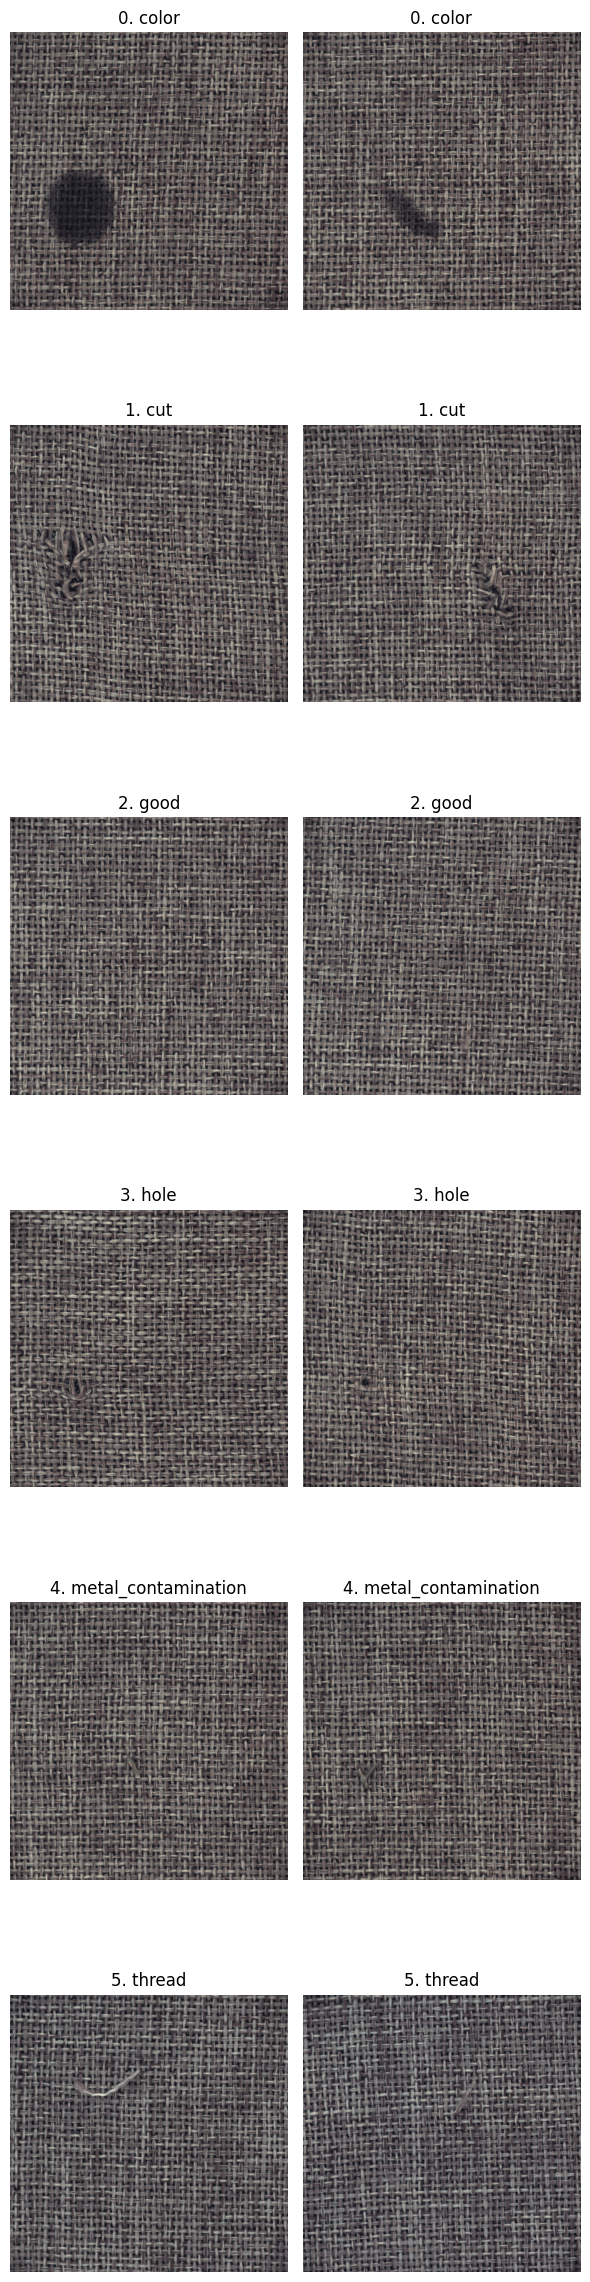

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 這兩行是根據助教檔案的命名規則 ... 字串處理
classes = sorted(set([path.split('/')[-2] for path in file_paths])) #1改-2
print(f'Classes: {classes}')

images_per_class = len(all_data) // len(classes)
fig, axs = plt.subplots(len(classes), 2, figsize=(6, 4 * len(classes)))

for i, class_name in enumerate(classes):
    index = i * images_per_class
    for j in range(2):
        axs[i, j].set_title(f'{i}. {class_name}')
        axs[i, j].imshow(all_data[index + j])
        axs[i, j].axis('off')

plt.tight_layout()
plt.show()

## A. Data Loading and Preprocessing

In [6]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np

num_classes = 6
images_per_class = 17 #最少的張數
train_images_per_class = int(images_per_class * 0.8)
val_images_per_class = int(images_per_class * 0.2)+1
print(train_images_per_class)
print(val_images_per_class)

x_train = []
x_val = []

for i in range(num_classes):
    start_index = i * images_per_class
    x_train.extend(all_data[start_index:start_index + train_images_per_class])
    x_val.extend(all_data[start_index + train_images_per_class:start_index + images_per_class])

# The shape changes from (batch_size, height, width, channels) to (batch_size, channels, height, width) 轉成pytorch可以吃的格式
x_train = np.transpose(np.array(x_train), (0, 3, 1, 2))
x_val = np.transpose(np.array(x_val), (0, 3, 1, 2))

y_train = np.concatenate([np.full(train_images_per_class, i) for i in range(num_classes)])
y_val = np.concatenate([np.full(val_images_per_class, i) for i in range(num_classes)])

print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of x_val: {x_val.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_val: {y_val.shape}')

# print(x_train)
# print(x_val)
# print(y_train)
# print(y_val)


13
4
Shape of x_train: (78, 3, 1024, 1024)
Shape of x_val: (24, 3, 1024, 1024)
Shape of y_train: (78,)
Shape of y_val: (24,)


In [96]:
# 這邊有故意把參數設很醜 和作業有關
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image

resize = 256
# 把1024*1024 resize 成32*32
train_transforms = transforms.Compose(
    [
        transforms.Resize((resize, resize)), #32可以改
        transforms.AutoAugment(),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ]
)

val_transforms = transforms.Compose(
    [
        transforms.Resize((resize, resize)), #32可以改
        transforms.ToTensor(),
    ]
)

class MyDataset(Dataset):
    def __init__(self, x, y, transform=None):
        self.x = x
        self.y = torch.from_numpy(y).long()
        self.transform = transform

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        new_x = np.transpose(self.x[idx], (1, 2, 0))
        return self.transform(Image.fromarray(new_x)), self.y[idx]

In [97]:
batch_size = 32

train_dataset = MyDataset(x_train, y_train, train_transforms)
val_dataset = MyDataset(x_val, y_val, val_transforms)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True, persistent_workers=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False, num_workers=1, pin_memory=True, persistent_workers=True)

## B. Defining Neural Networks

In [98]:
# 作業有一題的重點!
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

# 這邊要改!!! 要上torchvision的網站，例如如果要換成AlexNet 那要改成models.alexnet(weights='IMAGENET1K_V1')
#model = models.resnet18(weights='IMAGENET1K_V1') # 希望大家去換pretrain的weight 被定義在torchvision的models裡面
model = models.resnet50(weights='IMAGENET1K_V2')

# ConvNet as fixed feature extractor (freeze parameters)
for param in model.parameters():
    param.requires_grad = False

num_ftrs = model.fc.in_features
num_class = 6 ##這裡絕對要改!!! 6

# change # of class from 1000 into 8 in the last layer
# 最後一層的名字可能不叫做fc 也有另外一種方法 直接指定成-1就好了 就不用去找名字
model.fc = nn.Linear(num_ftrs, num_class)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## C. Training the Neural Network

In [99]:
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR, StepLR
from tqdm.auto import tqdm

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# 這邊故意設50 所以結果不會很好
epochs = 300 #
model = model.cuda()

best_val_loss = float('inf')
best_val_acc = -1

learning_rate = 1e-3
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate) ###
lr_scheduler = CosineAnnealingLR(optimizer, T_max=len(train_loader)*epochs, eta_min=0)

for epoch in tqdm(range(epochs)):
    # Training
    model.train()
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for images, labels in train_loader:
        images = images.cuda()
        images = (images) / 255. #normalize
        labels = labels.cuda()
        optimizer.zero_grad()
        outputs = model(images)

        labels = labels.long()

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        train_predicted = outputs.argmax(-1)
        train_correct += (train_predicted == labels).sum().item()
        total_train_samples += labels.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.cuda()
            images = (images) / 255.
            labels = labels.cuda()
            outputs = model(images)

            labels = labels.long()

            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            predicted = outputs.argmax(-1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    # Learning rate update
    lr_scheduler.step()

    # Checkpoint
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'model_classification.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.4f}%, Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.4f}%, Best Val loss: {best_val_loss:.4f} Best Val acc: {best_val_acc:.2f}%')

    # Store performance
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

  0%|          | 0/300 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 1/300, Train loss: 1.7947, Train acc: 17.9487%, Val loss: 1.8018, Val acc: 16.6667%, Best Val loss: 1.8018 Best Val acc: 16.67%
Epoch 2/300, Train loss: 1.7719, Train acc: 24.3590%, Val loss: 1.7990, Val acc: 16.6667%, Best Val loss: 1.7990 Best Val acc: 16.67%
Epoch 3/300, Train loss: 1.7335, Train acc: 33.3333%, Val loss: 1.8040, Val acc: 16.6667%, Best Val loss: 1.7990 Best Val acc: 16.67%
Epoch 4/300, Train loss: 1.7152, Train acc: 39.7436%, Val loss: 1.8031, Val acc: 16.6667%, Best Val loss: 1.7990 Best Val acc: 16.67%
Epoch 5/300, Train loss: 1.6957, Train acc: 32.0513%, Val loss: 1.8044, Val acc: 16.6667%, Best Val loss: 1.7990 Best Val acc: 16.67%
Epoch 6/300, Train loss: 1.6705, Train acc: 43.5897%, Val loss: 1.8033, Val acc: 16.6667%, Best Val loss: 1.7990 Best Val acc: 16.67%
Epoch 7/300, Train loss: 1.6972, Train acc: 39.7436%, Val loss: 1.8031, Val acc: 16.6667%, Best Val loss: 1.7990 Best Val acc: 16.67%
Epoch 8/300, Train loss: 1.6810, Train acc: 26.9231%, Val loss

### Visualizing model performance

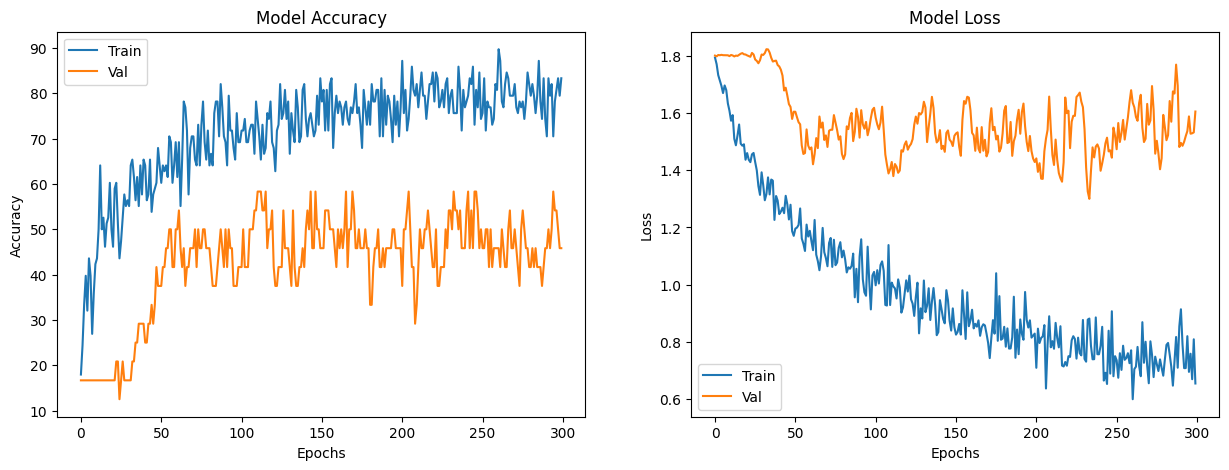

In [100]:


import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting training and validation accuracy
ax[0].plot(train_accuracies)
ax[0].plot(val_accuracies)
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Val'])

# Plotting training and validation loss
ax[1].plot(train_losses)
ax[1].plot(val_losses)
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Val'])

plt.show()

## D. Evaluating Your Trained Model

### Load Trained Model and Evaluate

In [101]:
# Load the trained weights
model.load_state_dict(torch.load('model_classification.pth'))

# Set the model to evaluation mode
model.eval()

test_correct = 0
test_total = 0

with torch.no_grad():
    for images, labels in val_loader:

        images = images.cuda()
        images = (images) / 255.

        labels = labels.cuda()
        labels = labels.long()

        outputs = model(images)

        predicted = outputs.argmax(-1)
        print(predicted)
        print(labels)
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

print(f'Test accuracy is {100. * test_correct / test_total}%')

tensor([0, 1, 0, 2, 1, 0, 0, 1, 2, 2, 2, 0, 3, 4, 0, 4, 4, 4, 4, 4, 3, 0, 5, 5],
       device='cuda:0')
tensor([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5],
       device='cuda:0')
Test accuracy is 58.333333333333336%


In [102]:
# 把各組超參數的數據整理進一個 Python 字典，然後轉換為 pandas DataFrame，以便於展示和分析
import pandas as pd
import os

# 假設以下變量已經包含了在給定的超參數設定下從訓練過程中收集的數據
# train_losses, train_accuracies, val_losses, val_accuracies

# 最後一個 Epoch 的訓練和驗證損失及準確率
final_train_loss = train_losses[-1]
final_train_accuracy = train_accuracies[-1]
final_val_loss = val_losses[-1]
final_val_accuracy = val_accuracies[-1]

# Test accuracy
test_accuracy = 100. * test_correct / test_total

# 將所有數據組織成一個字典
result = {
    'resize': [resize],
    'epoch': [epochs],
    'learning rate': [learning_rate],
    'Train Loss': [final_train_loss],
    'Train Accuracy': [final_train_accuracy],
    'Val Loss': [final_val_loss],
    'Val Accuracy': [final_val_accuracy],
    'Test Accuracy': [test_accuracy]
}

# # 轉換字典為 pandas DataFrame
# results_df = pd.DataFrame(result)

# 轉換字典為 DataFrame 的一行
new_results_df = pd.DataFrame(result)

# CSV 文件的路徑
results_csv_file = '/content/drive/MyDrive/lab3/results.csv'

# 檢查文件是否存在
if os.path.exists(results_csv_file):
    # 如果文件存在，載入現有的 DataFrame 並追加新數據
    existing_df = pd.read_csv(results_csv_file)
    updated_df = pd.concat([existing_df, new_results_df], ignore_index=True)
else:
    # 如果文件不存在，則創建一個新的 DataFrame
    updated_df = new_results_df

print(type(existing_df))
print(type(new_results_df))

# 將更新後的 DataFrame 儲存到 CSV 文件中
updated_df.to_csv(results_csv_file, index=False)

# 顯示更新後的 DataFrame
print(updated_df)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
    resize  epoch  learning rate  Train Loss  Train Accuracy  Val Loss  \
0       32     50          0.001    1.530685       34.615385  1.861073   
1       64     50          0.001    1.524701       33.333333  1.797062   
2       64    100          0.001    1.198299       55.128205  1.758594   
3       64    100          0.001    1.076384       65.384615  1.647648   
4      128    100          0.001    0.949010       64.102564  1.600132   
5      128    100          0.001    1.044234       66.666667  1.264314   
6      256    100          0.001    1.044922       66.666667  1.471948   
7      128    150          0.001    0.804934       78.205128  1.355302   
8       64    150          0.001    0.822123       82.051282  1.259205   
9      256    150          0.001    0.836536       82.051282  1.560827   
10     128    300          0.001    0.672409       78.205128  1.419400   
11      32    300          0.001    

In [16]:
# 保留列名但刪除所有數據
# updated_df = updated_df[0:0]
# print(updated_df)

Empty DataFrame
Columns: [resize, epoch, learning rate, Train Loss, Train Accuracy, Val Loss, Val Accuracy, Test Accuracy]
Index: []
